In [1]:
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.patheffects as path_effects

# You can leave this alone. It connects you to the database.
client = MongoClient('161.35.53.173',
                     27017,
                     authSource='covid',
                     username='student',
                     password='dogsnotcats')  # See the week 14 video for the password
db = client['covid']
covidtweets = db['tweets']
print (covidtweets)



Collection(Database(MongoClient(host=['161.35.53.173:27017'], document_class=dict, tz_aware=False, connect=True, authsource='covid'), 'covid'), 'tweets')


In [2]:
def search(query={}):
    """Searches Dr. Allen's COVID Tweets DB and returns a PyMongo cursor"""
    
    try:
        results = covidtweets.find(query)
    except:
        print("Could not execute query.")
        sys.exit()
    else:
        return results


def sample(samplesize=1):
    """Returns a random sample of tweets of the size past, or 1."""
    
    results = covidtweets.aggregate([{'$sample': {'size': samplesize}}])
    allowDiskUse:true
    return results

# SEARCHING FOR TWEETS
# Pass a dict to define query or you'll search all 1mil tweets.
# Comment out the line below if you're using the sample method.
data = search()


data = sample(50000)

In [3]:


x1= []
x2= []
x3= []


for x in data:
    x1.append(x['created_at'])
    x2.append(x['id'])
    x3.append(x['full_text'])

    
time_stamp = []
user_id = []
tweet = []

for x in range(len(x3)):
    if "covid" in x3[x]:
        time_stamp.append(x1[x])
        user_id.append(x2[x])
        tweet.append(x3[x])
    elif "effects" in x3[x]:
        time_stamp.append(x1[x])
        user_id.append(x2[x])
        tweet.append(x3[x])
    elif "recovery" in x3[x]:
        time_stamp.append(x1[x])
        user_id.append(x2[x])
        tweet.append(x3[x])
    elif "health" in x3[x]:
        time_stamp.append(x1[x])
        user_id.append(x2[x])
        tweet.append(x3[x])

In [5]:

df= pd.DataFrame({'Time Stamp': x1,
                'User ID': x2,
                'Tweet':x3})


df.head(100)

#initiating the CSV file
#df.to_csv(r'alim_coviddata.csv', index = False, header=True)

,Time Stamp,User ID,Tweet
0,Thu Jan 23 12:32:56 +0000 2020,1220323530325331973,"RT @MonitoringA3M: Epidemic, Level 4, Outbreak..."
1,Fri Mar 13 03:51:27 +0000 2020,1238311687473659904,RT @thederekminor: All that.... “You’ll be fin...
2,Thu Mar 19 21:58:36 +0000 2020,1240759602611961857,RT @IgnacioBCamposE: Cómic sobre el uso de cub...
3,Sat Mar 21 10:30:45 +0000 2020,1241311277915361280,RT @ANI: Ministry of Railways: 8 passengers wh...
4,Tue Mar 03 12:00:13 +0000 2020,1234810810679033856,"RT @Strandjunker: So, Ivanka Trump gained 23 t..."
...,...,...,...
95,Wed Mar 11 14:17:20 +0000 2020,1237744420637700097,RT @gmanews: BREAKING: Kinumpirma ng Departmen...
96,Fri Mar 13 09:23:50 +0000 2020,1238395335002574848,RT @champagne_unoo: class suspension because o...
97,Mon Mar 09 05:04:15 +0000 2020,1236880454474534917,RT @TenzingLamsang: 1/2 \n\nFor those civil se...
98,Mon Mar 23 11:23:14 +0000 2020,1242049261170237440,RT @bradshaaaw: Yesterday I knocked on my Tenn...


In [6]:
#Sorting by category
covid19=df[df['Tweet'].str.contains("covid19")]
effects=df[df['Tweet'].str.contains("effects")]
recovery=df[df['Tweet'].str.contains("recovery")]
health=df[df['Tweet'].str.contains("health")]

# Sorting by Count
covid19.count()
effects.count()
recovery.count()
health.count()

Time Stamp    986
User ID       986
Tweet         986
dtype: int64

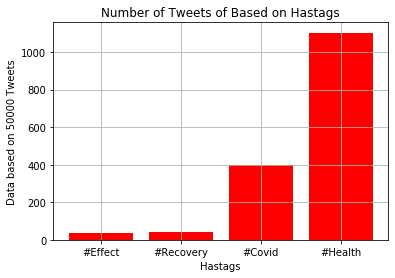

In [7]:
covid_count= 400
effect_count=37
recovery_count= 43
health_count= 1103 #1103


name = [ "Effect", "Recovery", "Covid", "Health"]
numbers = [37, 43, 400, 1103]
x_axis = np.arange(len(numbers))
plt.xticks(x_axis, ["#Effect", "#Recovery", "#Covid", "#Health"])
plt.title("Number of Tweets of Based on Hastags")
plt.xlabel("Hastags")
plt.ylabel("Data based on 50000 Tweets")
plt.grid(True)
plt.bar(x_axis, numbers, color='Red', align="center")
plt.savefig("Tweets_bargraph.png")

In [8]:
# Tweets by Days
coviday1=df[df['Time Stamp'].str.contains("Mon")] #Monday
coviday2=df[df['Time Stamp'].str.contains("Tue")] #Tuesday
coviday3=df[df['Time Stamp'].str.contains("Wed")] #Wednesday
coviday4=df[df['Time Stamp'].str.contains("Thu")] #Thursday
coviday5=df[df['Time Stamp'].str.contains("Fri")] #Friday
coviday6=df[df['Time Stamp'].str.contains("Sat")] #Saturday
coviday7=df[df['Time Stamp'].str.contains("Sun")] #Sunday

coviday1.count() #counts for monday
coviday2.count() #counts for tuesday
coviday3.count() #counts for wednesday
coviday4.count() #counts for thursday
coviday5.count() #counts for friday
coviday6.count() #counts for saturday
coviday7.count() #counts for monday

#Counts by days
monday=6105
tuesday=7122
wednesday=7639
thursday=7679
friday=6908
saturday=7543
sunday=7004

dayframe= pd.DataFrame({'Monday': [6105],
                        'Tuesday': [7122],
                       'Wednesday': [7639],
                       'Thursday': [7679],
                       'Friday': [6908],
                       'Saturday': [7543],
                       'Sunday': [7004]})


dayframe

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,6105,7122,7639,7679,6908,7543,7004


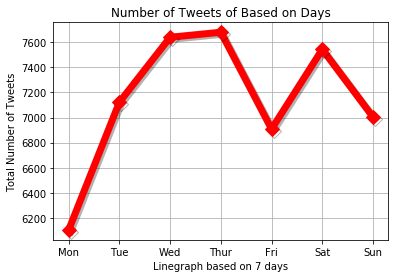

In [9]:
#line plot based on days
days = ["Mon","Tue","Wed","Thur","Fri","Sat","Sun"]
days_numbers = [6105, 7122, 7639, 7679, 6908, 7543, 7004]
plt.title("Number of Tweets of Based on Days")
plt.ylabel("Total Number of Tweets")

plt.xlabel("Linegraph based on 7 days")
plt.grid(True)
plt.plot(days, days_numbers, '-gD',markersize= 10, linewidth=7.0, path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()], color='r')
plt.savefig("tweet_linegraph.png")

In [10]:
#Counts by Months
covidmon1=df[df['Time Stamp'].str.contains("Jan")] #January
covidmon2=df[df['Time Stamp'].str.contains("Feb")] #February
covidmon3=df[df['Time Stamp'].str.contains("Mar")] #March
covidmon4=df[df['Time Stamp'].str.contains("Apr")] #April

covidmon1.count() #counts for January
covidmon2.count() #counts for February
covidmon3.count() #counts for March
covidmon4.count() #counts for April

january=4265
february=13623
march=30799
april=1313

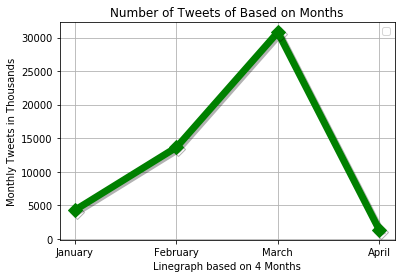

In [11]:
#Line plot based on months
months = ["January","February","March","April"]
days_numbers = [4265, 13623, 30799, 1313]
plt.title("Number of Tweets of Based on Months")
plt.ylabel("Monthly Tweets in Thousands")
plt.grid(True)
plt.legend("Month")
plt.xlabel("Linegraph based on 4 Months")

plt.plot(months, days_numbers, '-gD', markersize= 10, linewidth=7.0, path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()], color='green')
                                             
plt.savefig("tweet_monthgraph.png")